In [1]:
import datetime
now = datetime.datetime.now()
startNB = now
print("Date and time ",str(now))
#
import sys
import numpy as np
import scipy.ndimage as scimg
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#
# Control batch file numbers from  0001 to 0020
# Irradiated batch file numbers from 0001 to 0020
#imFile = "Images/ControlBatch/0001.bmp"
#imFile = "Images/IrradiatedBatch/0013.bmp"

#MC data file numbers 0*0-00* where * is number 0-9
imFile = "Images/MCdata/pBreak080/MCimage-pBreak080-003.bmp"
imNum ="80"
pBreak = 80 #manually change

#imFile = "Images/TestImages/DrawioPic.jpg"
#imFile = "Images/TestImages/P1240043.jpg"
#
# Evidence tuning needed in e.g. Control 0009, Control 0019, Irradiated 0013, Irradiated 0018
#
# Read in image
imgRaw = plt.imread(imFile)
#
print(" ")
print("File " + imFile + " read.")
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2021-05-14 09:49:42.123755


 
File Images/MCdata/pBreak080/MCimage-pBreak080-003.bmp read.
 
Date and time 2021-05-14 09:49:42.763570
Time since last check is 0:00:00.639815


In [2]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import numpy as np
#
def rgba2rgb(rgba, background = (255, 255, 255)):
    '''
    Function to convert RGBA images into RGB format. Input RGBA image (and background); output RGB image.
    '''
    rows, cols, chans = rgba.shape
    #
    debug = False
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
            return rgba
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 4, 'RGBA image must have 4 channels.'
    #
    rgb = np.zeros((rows, cols, 3), dtype = 'float32')
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    #
    a = np.asarray(a, dtype='float32')/255.0
    #
    R, G, B = background
    #
    rgb[:, :, 0] = r*a + (1.0 - a)*R
    rgb[:, :, 1] = g*a + (1.0 - a)*G
    rgb[:, :, 2] = b*a + (1.0 - a)*B
    #
    return np.asarray(rgb, dtype = np.uint8)
#
def rgb2grey(rgb, negative = 0):
    '''
    Convert RGB image to greyscale. Input RGB (and flag indicating negative required), output greyscale image.
    '''
    rows, cols, chans = rgb.shape
    #
    debug = False
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
        elif chans == 1:
            print("Greyscale image")
            return rgb
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 3, 'RGB image must have 3 channels.'
    #
    grey = np.zeros((rows, cols), dtype = 'float32')
    #
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    #
    grey[:, :] = (0.2125*(r*negative + (negative - 1.0)*r) + 
                  0.7154*(g*negative + (negative - 1.0)*g) + 
                  0.0721*(b*negative + (negative - 1.0)*b))
    #
    return np.asarray(grey, dtype = np.uint8)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2021-05-14 09:49:42.783274
 
Date and time 2021-05-14 09:49:42.783808
Time since last check is 0:00:00.000534


In [3]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
def ceilDiv(a, b):
    '''
    Return a//b rounded up.
    '''
    ceiling = -(-a//b)
    return ceiling
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2021-05-14 09:49:42.807655
 
Date and time 2021-05-14 09:49:42.808012
Time since last check is 0:00:00.000357


Date and time  2021-05-14 09:49:42.881211


Type of raw image file is uint8
Type of greyscale image file is uint8
Number of rows 1040 of columns 1392 of pixels 1447680 and depth 3
Maximum value in pixels 250
 
Number of thresholds 2
Number of rows in figure 3


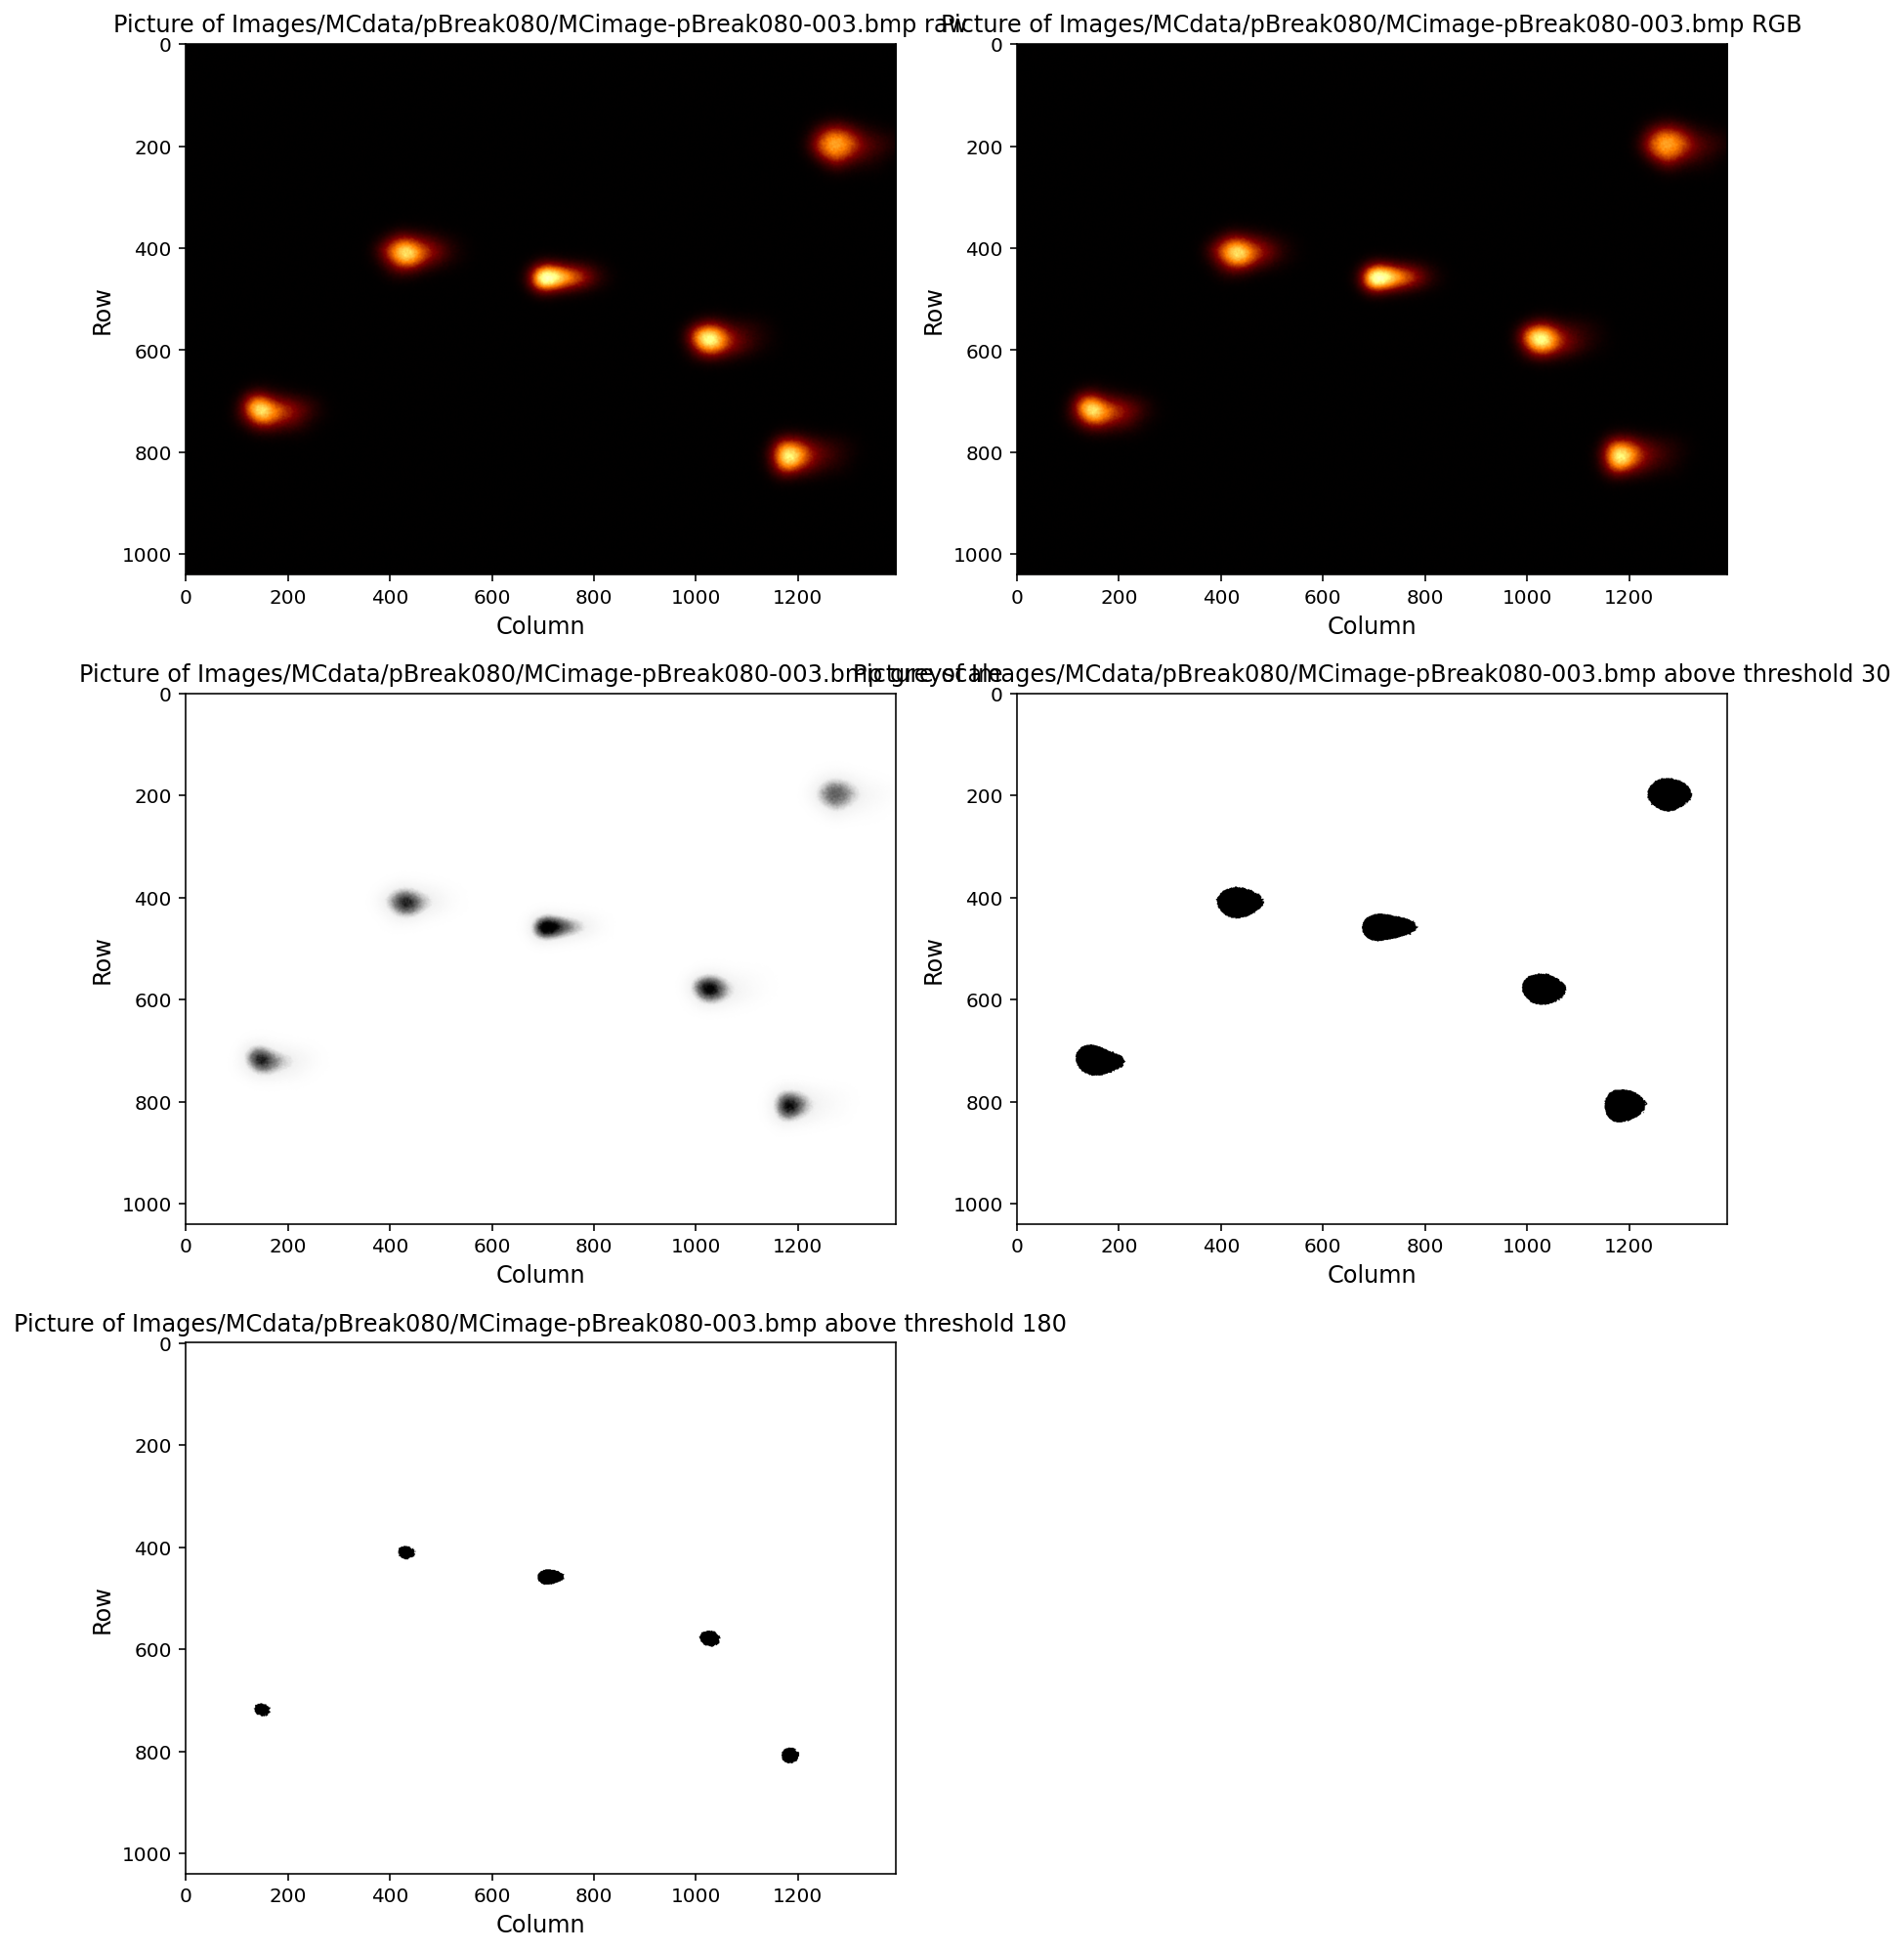

 
Date and time 2021-05-14 09:49:45.206830
Time since last check is 0:00:02.325619


In [4]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import sys
import numpy as np
import scipy.ndimage as scimg
import matplotlib.pyplot as plt
%matplotlib inline
# 
# Number of rows and columns. Depth is 3 for RGB, 4 for RGBA image. A is opacity (alpha)
nRows = imgRaw.shape[0] 
nCols = imgRaw.shape[1]
nDepth = imgRaw.shape[2]
#
# Set thresholds for applying to image (lowest to highest)
#thresh = np.array([10, 180]) 
thresh = np.array([30, 180]) 
nThresh = len(thresh)
img = np.zeros((nRows, nCols))
imgThr = np.zeros((nRows, nCols, nThresh))
#
# Determine image format and process accordingly
if nDepth == 4:
    imgRGB = rgba2rgb(imgRaw)
    imgGrey = rgb2grey(imgRGB, 0)
elif nDepth == 3:
    imgRGB = imgRaw
    imgGrey = rgb2grey(imgRGB, 1)
elif nDepth == 1:
    imgRGB = imgRaw
    imgGrey = imgRaw
else:
    print(" ")
    print("Unexpected image depth",nDepth)
    sys.stop()
#
print("Type of raw image file is",imgRaw.dtype)
print("Type of greyscale image file is",imgGrey.dtype)
print("Number of rows",nRows,"of columns",nCols,"of pixels",nRows*nCols,"and depth",nDepth)
print("Maximum value in pixels",np.amax(imgGrey))
#
# Plot image at various stages of processing
nFigRows = 2 + ceilDiv(nThresh, 2)
print(" ")
print("Number of thresholds",nThresh)
print("Number of rows in figure",nFigRows)
for nT in range(0, nThresh):
    imgThr[:, :, nT] = imgGrey > thresh[nT]
#
print(" ")
fig = plt.figure(figsize=(nFigRows*4, 14))
fig.add_subplot(nFigRows, 2, 1)
plt.title("Picture of " + imFile + " raw")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRaw, cmap = "jet")
#
fig.add_subplot(nFigRows, 2, 2)
plt.title("Picture of " + imFile + " RGB")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRGB, cmap = "jet")
#
fig.add_subplot(nFigRows, 2, 3)
plt.title("Picture of " + imFile + " greyscale")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgGrey, cmap = "Greys")
#
for nT in range(0, nThresh):
    fig.add_subplot(nFigRows, 2, 4 + nT)
    plt.title("Picture of " + imFile + " above threshold " + str(thresh[nT]))
    plt.xlabel('Column', fontsize = 12)
    plt.ylabel('Row', fontsize = 12)
    imgplot = plt.imshow(imgThr[:, :, nT], cmap = "Greys")
#
plt.tight_layout()
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2021-05-14 09:49:45.287695
Type of raw image file is uint8
Type of greyscale image file is uint8
Number of rows 1040 of columns 1392 of pixels 1447680 and depth 3
Maximum value in pixels 255
 
Number of thresholds 2
Number of rows in figure 3
 


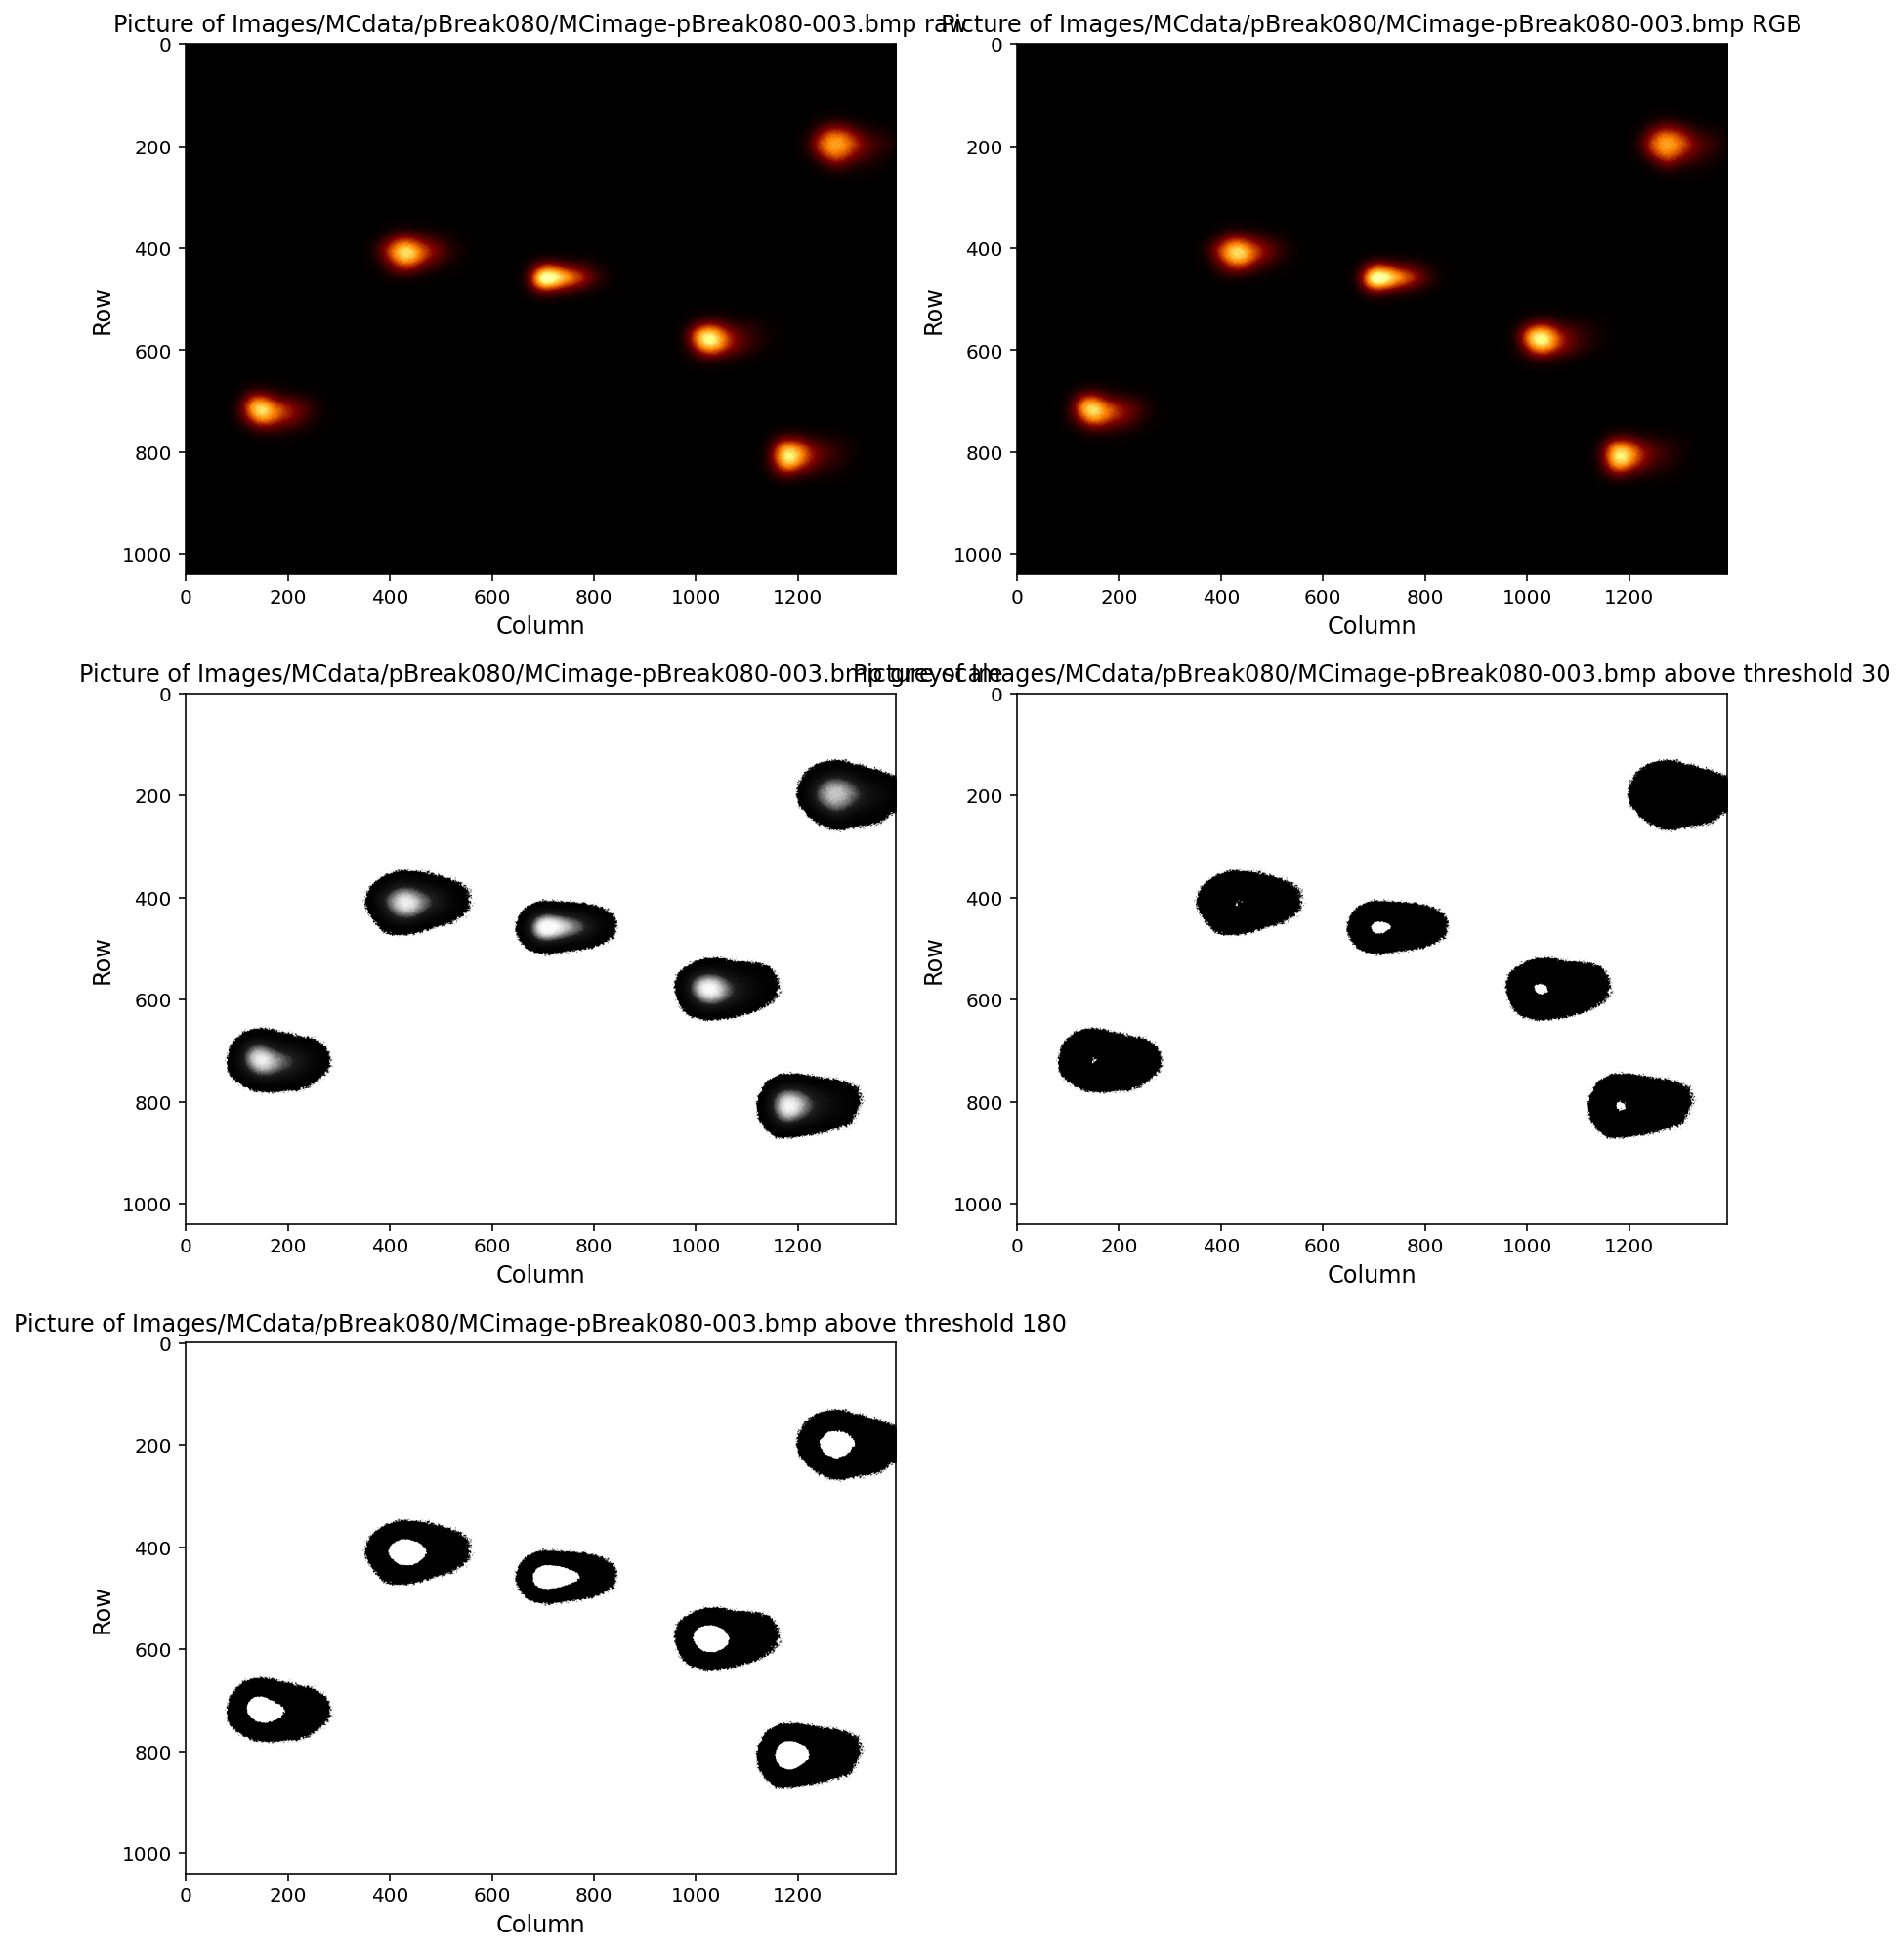

 
Date and time 2021-05-14 09:49:47.277523
Time since last check is 0:00:01.989828


In [5]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import sys
import numpy as np
import scipy.ndimage as scimg
import matplotlib.pyplot as plt
%matplotlib inline
# 
# Number of rows and columns. Depth is 3 for RGB, 4 for RGBA image. A is opacity (alpha)
nRows = imgRaw.shape[0] 
nCols = imgRaw.shape[1]
nDepth = imgRaw.shape[2]
#
# Set thresholds for applying to image (lowest to highest)
#thresh = np.array([10, 180]) 
thresh = np.array([30, 180]) 
nThresh = len(thresh)
img = np.zeros((nRows, nCols))
imgThr = np.zeros((nRows, nCols, nThresh))
#
# Determine image format and process accordingly
if nDepth == 4:
    imgRGB = rgba2rgb(imgRaw)
    imgGrey = rgb2grey(imgRGB, 1)
elif nDepth == 3:
    imgRGB = imgRaw
    imgGrey = rgb2grey(imgRGB, 0)
elif nDepth == 1:
    imgRGB = imgRaw
    imgGrey = imgRaw
else:
    print(" ")
    print("Unexpected image depth",nDepth)
    sys.stop()
#
print("Type of raw image file is",imgRaw.dtype)
print("Type of greyscale image file is",imgGrey.dtype)
print("Number of rows",nRows,"of columns",nCols,"of pixels",nRows*nCols,"and depth",nDepth)
print("Maximum value in pixels",np.amax(imgGrey))
#
# Plot image at various stages of processing
nFigRows = 2 + ceilDiv(nThresh, 2)
print(" ")
print("Number of thresholds",nThresh)
print("Number of rows in figure",nFigRows)
for nT in range(0, nThresh):
    imgThr[:, :, nT] = imgGrey > thresh[nT]
#
print(" ")
fig = plt.figure(figsize=(nFigRows*4, 14))
fig.add_subplot(nFigRows, 2, 1)
plt.title("Picture of " + imFile + " raw")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRaw, cmap = "jet")
#
fig.add_subplot(nFigRows, 2, 2)
plt.title("Picture of " + imFile + " RGB")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRGB, cmap = "jet")
#
fig.add_subplot(nFigRows, 2, 3)
plt.title("Picture of " + imFile + " greyscale")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgGrey, cmap = "Greys")
#
for nT in range(0, nThresh):
    fig.add_subplot(nFigRows, 2, 4 + nT)
    plt.title("Picture of " + imFile + " above threshold " + str(thresh[nT]))
    plt.xlabel('Column', fontsize = 12)
    plt.ylabel('Row', fontsize = 12)
    imgplot = plt.imshow(imgThr[:, :, nT], cmap = "Greys")
#
plt.tight_layout()
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

# watershed

Date and time 2021-05-14 09:49:47.584466
 
Cluster ID using Watershed algorithm
Cluster threshold 30 , head threshold 180 .
Min number of pixels in cluster 200 , max number 200000 .
Min number of pixels in head 40 , max number 20000 .


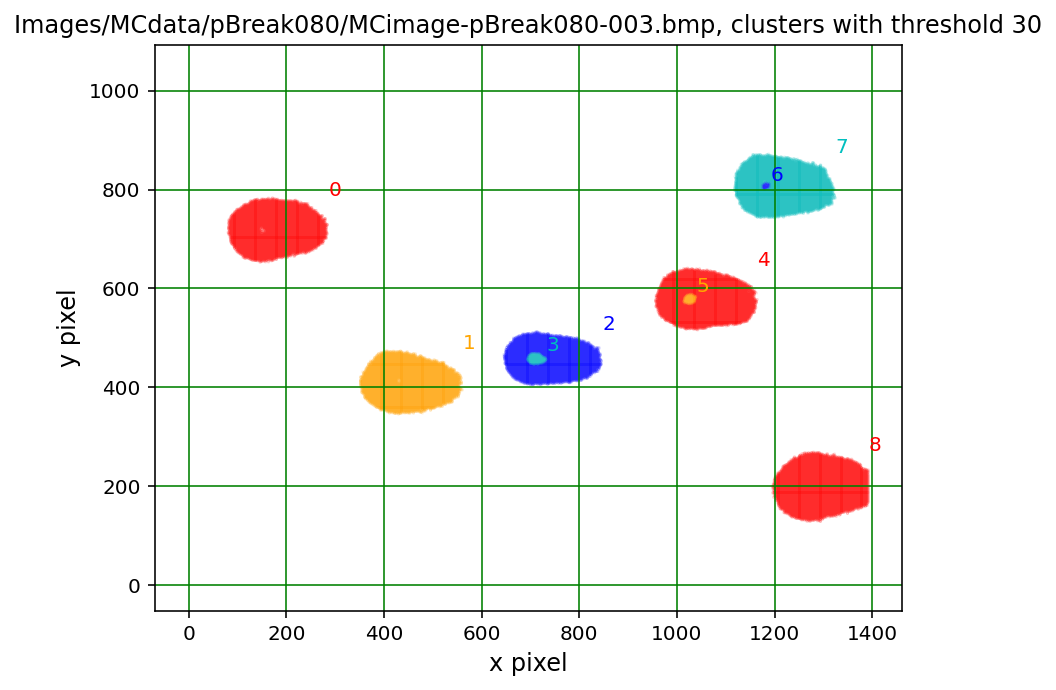

ValueError: could not broadcast input array from shape (18764) into shape (18150)

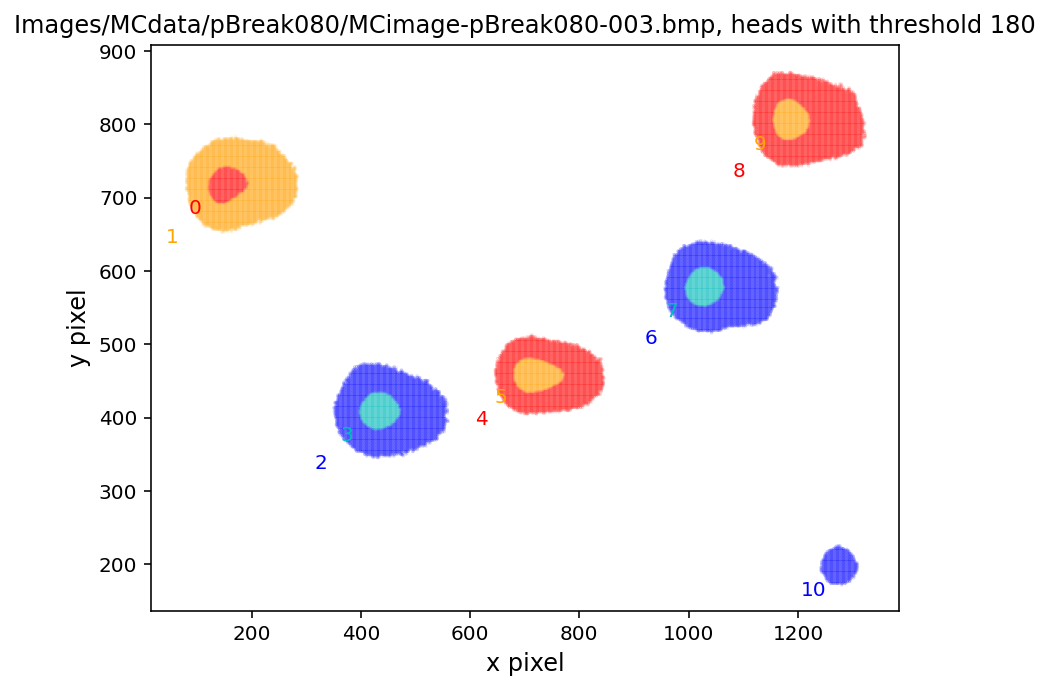

In [6]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
#
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
#
debug = False
if debug:
    print("Running in debug mode!")
    clusPic = np.zeros((nRows, nCols))

#
# Requirements on minimum and maximum number of pixels in wheels at the cluster and head thresholds
minClusPixels = 200
maxClusPixels = 200000
minHeadPixels = 40
maxHeadPixels = 20000
#
print(" ")
print("Cluster ID using Watershed algorithm")
print("Cluster threshold",thresh[0],"\b, head threshold",thresh[1],"\b.")
print("Min number of pixels in cluster",minClusPixels,"\b, max number",maxClusPixels,"\b.")
print("Min number of pixels in head",minHeadPixels,"\b, max number",maxHeadPixels,"\b.")
#
# Define grid of markers and background marker value:
nStepCols = 3
nStepRows = 3
rMark, cMark = np.ogrid[0:nRows:nStepRows, 0:nCols:nStepCols]
if debug:
    print(" ")
    print("rMark.shape",rMark.shape,"cMark.shape",cMark.shape)
mStart = 1
markers = np.zeros((nRows, nCols)).astype(np.int)
markers[rMark, cMark] = rMark/nStepRows + cMark*nRows/(nStepRows*nStepCols) + mStart
if debug:
    plt.figure(figsize = (6.7, 5.2))
    plt.imshow(markers, cmap = "CMRmap");
#
# Create image with cluster threshold and run watershed algorithm
clusImg = imgGrey > thresh[0]
if debug:
    plt.figure(figsize = (6.7, 5.2))
    plt.imshow(clusImg);
colDotsClus = ndimage.watershed_ift(clusImg.astype(np.uint8), markers)
#
# Remove "isolated" markers (i.e. markers in regions where no cluster found)
colDotsClus[rMark, cMark] = colDotsClus[rMark + 1, cMark]
#
# Find the value of the marker of the last identified regions
mMaxClus = np.amax(colDotsClus)
#
# Positions of marker values
boolClus = colDotsClus >= mStart
nFoundClus = len(np.unique(colDotsClus[boolClus]))
rMarkerClus = np.zeros(nFoundClus)
rMarkerClus = np.unique(colDotsClus[boolClus])
#
# Select the clusters, first pass (determine accepted number). Must exclude tiny clusters (noise) and any 
# really large clusters (background regions in image).
nClus = 0
cMarkerClus = np.zeros(nFoundClus)
maxInDotClus = 0
for nR in range(0, nFoundClus):
    boolClus = colDotsClus == rMarkerClus[nR]
    nHereCl = np.sum(boolClus)
    if nHereCl < minClusPixels or nHereCl > maxClusPixels:
        continue
    maxInDotClus = max(maxInDotClus, nHereCl)
    cMarkerClus[nClus] = rMarkerClus[nR]
    nClus += 1
#
# Create image with head threshold and run watershed algorithm
headImg = imgGrey > thresh[1]
if debug:
    plt.figure(figsize = (6.7, 5.2))
    plt.imshow(headImg);
colDotsHead = ndimage.watershed_ift(headImg.astype(np.uint8), markers)
#
# Remove "isolated" markers
colDotsHead[rMark, cMark] = colDotsHead[rMark + 1, cMark]
#
# Find the value of the marker of the last identified regions.
mMaxHead = np.amax(colDotsHead)
#
# Positions of marker values that are not background
boolHead = colDotsHead > mStart
nFoundHead = len(np.unique(colDotsHead[boolHead]))
rMarkerHead = np.zeros(nFoundHead)
rMarkerHead = np.unique(colDotsHead[boolHead])
#
# Select the heads, first pass (determine accepted number). Must exclude tiny clusters (noise) and any 
# really large clusters (background regions in image).
nHead = 0
cMarkerHead = np.zeros(nFoundHead)
maxInDotHead = 0
for nR in range(0, nFoundHead):
    boolHead = colDotsHead == rMarkerHead[nR]
    nHereHd = np.sum(boolHead)
    if nHereHd < minHeadPixels or nHereHd > maxHeadPixels:
        continue
    maxInDotHead = max(maxInDotHead, nHereHd) 
    cMarkerHead[nHead] = rMarkerHead[nR]
    nHead += 1
#
# Colour table for plots
nColTab = 4
colorTab = ['r', 'orange', 'b', 'c']
#
# Information on clusters
nInCluster = np.zeros(nClus).astype(int)
iClusSum = np.zeros(nClus)
#
# Information on pixels in clusters
lClus = np.sum(clusImg)
#
# Safe size of arrays would be number of pixels in image. Try to reduce size by using number of pixels in clusters
# The factor lFact can be used to expand array sizes
lFact = 4
indexCl = np.zeros(lFact*lClus)
cPixelsCl = np.zeros(lFact*lClus).astype(int)
rPixelsCl = np.zeros(lFact*lClus).astype(int)
iPixelsCl = np.zeros(lFact*lClus)
#
# Information on head
nInHead = np.zeros(nHead).astype(int)
iHeadSum = np.zeros(nHead)
#
# Information on pixels in head (lHead must be large enough...here probably larger than usually needed)
lHead = lClus
indexHd = np.zeros(lHead)
cPixelsHd = np.zeros(lHead).astype(int)
rPixelsHd = np.zeros(lHead).astype(int)
iPixelsHd = np.zeros(lHead)
#
# Temporary information 
cPixelsHere = np.zeros(lClus).astype(int)
rPixelsHere = np.zeros(lClus).astype(int)
iPixelsHere = np.zeros(lClus)
thisPic = np.zeros((nRows, nCols))
#
# Find pixels in clusters, determine positions and plot 
fig = plt.figure(figsize=(6.7, 5.2))
ax = fig.add_subplot(1, 1, 1)
plt.title(imFile + ", clusters with threshold " + str(thresh[0]), fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
#
# Figure control
xOffMax = 2
yOffMax = 2
mSize = 0.001
#
nCol = 0
nLastCl = 0
for nC in range(0, nClus):
    #
    # Clusters
    boolClus = colDotsClus == cMarkerClus[nC]
    nHereCl = np.sum(boolClus).astype(int)
    #
    nInCluster[nC] = nHereCl
    #
    # Indices of x and y pixels
    rPixelsHere, cPixelsHere = np.where(boolClus)
    thisPic.fill(0) 
    thisPic[rPixelsHere, cPixelsHere] = 1
    if debug:
        clusPic += thisPic
    #
    # Intensities in pixels
    iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
    iClusSum[nC] = np.sum(iPixelsHere)
    #
    indexCl[nLastCl:nLastCl + nHereCl] = nC*np.ones(nHereCl)
    cPixelsCl[nLastCl:nLastCl + nHereCl] = cPixelsHere[:]
    rPixelsCl[nLastCl:nLastCl + nHereCl] = rPixelsHere[:]
    iPixelsCl[nLastCl:nLastCl + nHereCl] = iPixelsHere[:]
    #
    plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = colorTab[nCol], marker = 'o')
    rLab = np.amax(rPixelsHere[0:nHereCl]) + yOffMax
    cLab = np.amax(cPixelsHere[0:nHereCl]) + xOffMax
    plt.text(cLab, rLab, str(nC), color = colorTab[nCol])
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
    nLastCl = nLastCl + nHereCl
    #
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'g')
print(" ")
plt.show()
#
# Find pixels in head, determine positions and plot
fig = plt.figure(figsize=(6.7, 5.2))
ax = fig.add_subplot(1, 1, 1)
plt.title(imFile + ", heads with threshold " + str(thresh[1]), fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
#
# Figure control
xOffMin = 15.0
yOffMin = 35.0
mSize = 0.001
#
nCol = 0
nLastHd = 0
for nH in range(0, nHead):
    boolHead = colDotsHead == cMarkerHead[nH]
    nHereHd = np.sum(boolHead).astype(int)
    #
    nInHead[nH] = nHereHd
    #
    # Indices of x and y pixels
    rPixelsHere, cPixelsHere = np.where(boolHead)
    #
    # Intensities in pixels
    iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
    iHeadSum[nH] = np.sum(iPixelsHere)
    #
    indexHd[nLastHd:nLastHd + nHereHd] = nC*np.ones(nInHead[nH])
    cPixelsHd[nLastHd:nLastHd + nHereHd] = cPixelsHere[0:nHereHd]
    rPixelsHd[nLastHd:nLastHd + nHereHd] = rPixelsHere[0:nHereHd]
    iPixelsHd[nLastHd:nLastHd + nHereHd] = iPixelsHere[0:nHereHd]
    #
    plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = colorTab[nCol], marker = 'o')
    rLab = np.amin(rPixelsHere) - xOffMin
    cLab = np.amin(cPixelsHere) - yOffMin
    plt.text(cLab, rLab, str(nH), color = colorTab[nCol])
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
    nLastHd = nLastHd + nHereHd
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'g')
print(" ")
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

In [0]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
#
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
#
debug = False
if debug:
    print("Running in debug mode!")
    clusPic = np.zeros((nRows, nCols))

#
# Requirements on minimum and maximum number of pixels in wheels at the cluster and head thresholds
minClusPixels = 200
maxClusPixels = 200000
minHeadPixels = 40
maxHeadPixels = 20000
#
print(" ")
print("Cluster ID using Watershed algorithm")
print("Cluster threshold",thresh[0],"\b, head threshold",thresh[1],"\b.")
print("Min number of pixels in cluster",minClusPixels,"\b, max number",maxClusPixels,"\b.")
print("Min number of pixels in head",minHeadPixels,"\b, max number",maxHeadPixels,"\b.")
#
# Define grid of markers and background marker value:
nStepCols = 3
nStepRows = 3
rMark, cMark = np.ogrid[0:nRows:nStepRows, 0:nCols:nStepCols]
if debug:
    print(" ")
    print("rMark.shape",rMark.shape,"cMark.shape",cMark.shape)
mStart = 1
markers = np.zeros((nRows, nCols)).astype(np.int)
markers[rMark, cMark] = rMark/nStepRows + cMark*nRows/(nStepRows*nStepCols) + mStart
if debug:
    plt.figure(figsize = (6.7, 5.2))
    plt.imshow(markers, cmap = "CMRmap");
#
# Create image with cluster threshold and run watershed algorithm
clusImg = imgGrey > thresh[0]
if debug:
    plt.figure(figsize = (6.7, 5.2))
    plt.imshow(clusImg);
colDotsClus = ndimage.watershed_ift(clusImg.astype(np.uint8), markers)
#
# Remove "isolated" markers (i.e. markers in regions where no cluster found)
colDotsClus[rMark, cMark] = colDotsClus[rMark + 1, cMark]
#
# Find the value of the marker of the last identified regions
mMaxClus = np.amax(colDotsClus)
#
# Positions of marker values
boolClus = colDotsClus >= mStart
nFoundClus = len(np.unique(colDotsClus[boolClus]))
rMarkerClus = np.zeros(nFoundClus)
rMarkerClus = np.unique(colDotsClus[boolClus])
#
# Select the clusters, first pass (determine accepted number). Must exclude tiny clusters (noise) and any 
# really large clusters (background regions in image).
nClus = 0
cMarkerClus = np.zeros(nFoundClus)
maxInDotClus = 0
for nR in range(0, nFoundClus):
    boolClus = colDotsClus == rMarkerClus[nR]
    nHereCl = np.sum(boolClus)
    if nHereCl < minClusPixels or nHereCl > maxClusPixels:
        continue
    maxInDotClus = max(maxInDotClus, nHereCl)
    cMarkerClus[nClus] = rMarkerClus[nR]
    nClus += 1
#
# Create image with head threshold and run watershed algorithm
headImg = imgGrey > thresh[1]
if debug:
    plt.figure(figsize = (6.7, 5.2))
    plt.imshow(headImg);
colDotsHead = ndimage.watershed_ift(headImg.astype(np.uint8), markers)
#
# Remove "isolated" markers
colDotsHead[rMark, cMark] = colDotsHead[rMark + 1, cMark]
#
# Find the value of the marker of the last identified regions.
mMaxHead = np.amax(colDotsHead)
#
# Positions of marker values that are not background
boolHead = colDotsHead > mStart
nFoundHead = len(np.unique(colDotsHead[boolHead]))
rMarkerHead = np.zeros(nFoundHead)
rMarkerHead = np.unique(colDotsHead[boolHead])
#
# Select the heads, first pass (determine accepted number). Must exclude tiny clusters (noise) and any 
# really large clusters (background regions in image).
nHead = 0
cMarkerHead = np.zeros(nFoundHead)
maxInDotHead = 0
for nR in range(0, nFoundHead):
    boolHead = colDotsHead == rMarkerHead[nR]
    nHereHd = np.sum(boolHead)
    if nHereHd < minHeadPixels or nHereHd > maxHeadPixels:
        continue
    maxInDotHead = max(maxInDotHead, nHereHd) 
    cMarkerHead[nHead] = rMarkerHead[nR]
    nHead += 1
#
# Colour table for plots
nColTab = 4
colorTab = ['r', 'orange', 'b', 'c']
#
# Information on clusters
nInCluster = np.zeros(nClus).astype(int)
iClusSum = np.zeros(nClus)
#
# Information on pixels in clusters
lClus = np.sum(clusImg)
#
# Safe size of arrays would be number of pixels in image. Try to reduce size by using number of pixels in clusters
# The factor lFact can be used to expand array sizes
lFact = 4
indexCl = np.zeros(lFact*lClus)
cPixelsCl = np.zeros(lFact*lClus).astype(int)
rPixelsCl = np.zeros(lFact*lClus).astype(int)
iPixelsCl = np.zeros(lFact*lClus)
#
# Information on head
nInHead = np.zeros(nHead).astype(int)
iHeadSum = np.zeros(nHead)
#
# Information on pixels in head (lHead must be large enough...here probably larger than usually needed)
lHead = lClus
indexHd = np.zeros(lHead)
cPixelsHd = np.zeros(lHead).astype(int)
rPixelsHd = np.zeros(lHead).astype(int)
iPixelsHd = np.zeros(lHead)
#
# Temporary information 
cPixelsHere = np.zeros(lClus).astype(int)
rPixelsHere = np.zeros(lClus).astype(int)
iPixelsHere = np.zeros(lClus)
thisPic = np.zeros((nRows, nCols))
#
# Find pixels in clusters, determine positions and plot 
fig = plt.figure(figsize=(6.7, 5.2))
ax = fig.add_subplot(1, 1, 1)
plt.title(imFile + ", clusters with threshold " + str(thresh[0]), fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
#
# Figure control
xOffMax = 2
yOffMax = 2
mSize = 0.001
#
nCol = 0
nLastCl = 0
for nC in range(0, nClus):
    #
    # Clusters
    boolClus = colDotsClus == cMarkerClus[nC]
    nHereCl = np.sum(boolClus).astype(int)
    #
    nInCluster[nC] = nHereCl
    #
    # Indices of x and y pixels
    rPixelsHere, cPixelsHere = np.where(boolClus)
    thisPic.fill(0) 
    thisPic[rPixelsHere, cPixelsHere] = 1
    if debug:
        clusPic += thisPic
    #
    # Intensities in pixels
    iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
    iClusSum[nC] = np.sum(iPixelsHere)
    #
    indexCl[nLastCl:nLastCl + nHereCl] = nC*np.ones(nHereCl)
    cPixelsCl[nLastCl:nLastCl + nHereCl] = cPixelsHere[:]
    rPixelsCl[nLastCl:nLastCl + nHereCl] = rPixelsHere[:]
    iPixelsCl[nLastCl:nLastCl + nHereCl] = iPixelsHere[:]
    #
    plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = colorTab[nCol], marker = 'o')
    rLab = np.amax(rPixelsHere[0:nHereCl]) + yOffMax
    cLab = np.amax(cPixelsHere[0:nHereCl]) + xOffMax
    plt.text(cLab, rLab, str(nC), color = colorTab[nCol])
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
    nLastCl = nLastCl + nHereCl
    #
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'g')
print(" ")
plt.show()
#
# Find pixels in head, determine positions and plot
fig = plt.figure(figsize=(6.7, 5.2))
ax = fig.add_subplot(1, 1, 1)
plt.title(imFile + ", heads with threshold " + str(thresh[1]), fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
#
# Figure control
xOffMin = 15.0
yOffMin = 35.0
mSize = 0.001
#
nCol = 0
nLastHd = 0
for nH in range(0, nHead):
    boolHead = colDotsHead == cMarkerHead[nH]
    nHereHd = np.sum(boolHead).astype(int)
    #
    nInHead[nH] = nHereHd
    #
    # Indices of x and y pixels
    rPixelsHere, cPixelsHere = np.where(boolHead)
    #
    # Intensities in pixels
    iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
    iHeadSum[nH] = np.sum(iPixelsHere)
    #
    indexHd[nLastHd:nLastHd + nHereHd] = nC*np.ones(nInHead[nH])
    cPixelsHd[nLastHd:nLastHd + nHereHd] = cPixelsHere[0:nHereHd]
    rPixelsHd[nLastHd:nLastHd + nHereHd] = rPixelsHere[0:nHereHd]
    iPixelsHd[nLastHd:nLastHd + nHereHd] = iPixelsHere[0:nHereHd]
    #
    plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = colorTab[nCol], marker = 'o')
    rLab = np.amin(rPixelsHere) - xOffMin
    cLab = np.amin(cPixelsHere) - yOffMin
    plt.text(cLab, rLab, str(nH), color = colorTab[nCol])
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
    nLastHd = nLastHd + nHereHd
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'g')
print(" ")
plt.show()
#
plt.savefig(imNum + ",clusters with therashold 180 and 30")
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

In [0]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
#
import matplotlib.patches as mpatches
#from matplotlib.colors import LogNorm
#%matplotlib inline
plt.figure(figsize = (6.7, 5.2))
plt.title(imFile + "30 and 180 thresholds ", fontsize = 12)
#

nCol = 0
nLastCl = 0
for nC in range(0, nClus):
     #
    # Clusters
    boolClus = colDotsClus == cMarkerClus[nC]
    nHereCl = np.sum(boolClus).astype(int)
    #
     #
    nInCluster[nC] = nHereCl
    #
    # Indices of x and y pixels
    rPixelsHere, cPixelsHere = np.where(boolClus)
    thisPic.fill(0) 
    thisPic[rPixelsHere, cPixelsHere] = 1
    if debug:
        clusPic += thisPic
    #
    # Intensities in pixels
    iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
    iClusSum[nC] = np.sum(iPixelsHere)
    #
    indexCl[nLastCl:nLastCl + nHereCl] = nC*np.ones(nHereCl)
    cPixelsCl[nLastCl:nLastCl + nHereCl] = cPixelsHere[:]
    rPixelsCl[nLastCl:nLastCl + nHereCl] = rPixelsHere[:]
    iPixelsCl[nLastCl:nLastCl + nHereCl] = iPixelsHere[:]
    #
    plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = colorTab[nCol], marker = 'o')
    rLab = np.amax(rPixelsHere[0:nHereCl]) + yOffMax
    cLab = np.amax(cPixelsHere[0:nHereCl]) + xOffMax
    plt.text(cLab, rLab, str(nC), color = colorTab[nCol])
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
    nLastCl = nLastCl + nHereCl
    #
#
# Figure control
xOffMin = 15.0
yOffMin = 35.0
mSize = 0.001
#
nCol = 0
nLastHd = 0
for nH in range(0, nHead):
    boolHead = colDotsHead == cMarkerHead[nH]
    nHereHd = np.sum(boolHead).astype(int)
    #
    nInHead[nH] = nHereHd
    #
    # Indices of x and y pixels
    rPixelsHere, cPixelsHere = np.where(boolHead)
    #
    # Intensities in pixels
    iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
    iHeadSum[nH] = np.sum(iPixelsHere)
    #
    indexHd[nLastHd:nLastHd + nHereHd] = nC*np.ones(nInHead[nH])
    cPixelsHd[nLastHd:nLastHd + nHereHd] = cPixelsHere[0:nHereHd]
    rPixelsHd[nLastHd:nLastHd + nHereHd] = rPixelsHere[0:nHereHd]
    iPixelsHd[nLastHd:nLastHd + nHereHd] = iPixelsHere[0:nHereHd]
    #
    plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = 'black', marker = 'o')
    rLab = np.amin(rPixelsHere) - xOffMin
    cLab = np.amin(cPixelsHere) - yOffMin
    plt.text(cLab, rLab, str(nH), color = colorTab[nCol])
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
    nLastHd = nLastHd + nHereHd
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
plt.grid(color = 'dimgray', ls = '-')
print(" ")
plt.show()
#




plt.savefig(imNum + ",clusters with therashold 180 and 30")

In [0]:
from prettytable import PrettyTable
def makePrettyTable(table_col1, table_col2, table_col3, table_col4, table_col5):
    table = PrettyTable()
    table.add_column("Number", table_col1)
    table.add_column("x Minimum", table_col2)
    table.add_column("x Maximum", table_col3)
    table.add_column("y Minimum", table_col4)
    table.add_column("y Maximum", table_col5)
    print(table)


In [0]:
# Find minimum and maximum column values for head, colMinHd, colMaxHd
#Find minimum and maximum row values for head, rowMinHd, rowMaxHd
# Clusters

nLastCl = 0
nLastClEd = 0

#empty arrays
cMaxCl_arr = []
rMaxCl_arr = []
cMinCl_arr = []
rMinCl_arr = []

for i in range(0, nClus):
    nHereCl = nInCluster[i] 
    # '.append' - add value within brackets to the array specified
    cMaxCl_arr.append(np.amax(cPixelsCl[nLastCl:nLastCl + nHereCl])) #maximum x value
    rMaxCl_arr.append(np.amax(rPixelsCl[nLastCl:nLastCl + nHereCl])) #maximum y value
    cMinCl_arr.append(np.amin(cPixelsCl[nLastCl:nLastCl + nHereCl])) #minimum x value
    rMinCl_arr.append(np.amin(rPixelsCl[nLastCl:nLastCl + nHereCl])) #minimum y value
    #
    nLastCl = nLastCl + nHereCl
    #


# Heads

nLastHd = 0
nLastHdEd = 0
cMaxHd_arr = []
rMaxHd_arr = []
cMinHd_arr = []
rMinHd_arr = []

for j in range(0, nHead):
    nHereHd = nInHead[j]
    #
    cMaxHd_arr.append(np.amax(cPixelsHd[nLastHd:nLastHd + nHereHd]))
    rMaxHd_arr.append(np.amax(rPixelsHd[nLastHd:nLastHd + nHereHd]))
    cMinHd_arr.append(np.amin(cPixelsHd[nLastHd:nLastHd + nHereHd]))
    rMinHd_arr.append(np.amin(rPixelsHd[nLastHd:nLastHd + nHereHd]))
    #
    nLastHd = nLastHd + nHereHd
    #

print('Cluster Boundaries')
#
i = np.arange(0, nClus)

makePrettyTable(i, cMinCl_arr, cMaxCl_arr, rMinCl_arr, rMaxCl_arr)
print(' ')
print('Head Boundaries')
#
j = np.arange(0, nHead)

makePrettyTable(j, cMinHd_arr, cMaxHd_arr, rMinHd_arr, rMaxHd_arr)


In [0]:
nGoodClus = 0
clus_num = np.zeros(nClus).astype(int)
clus_row = np.zeros((nClus, np.amax(nInCluster))).astype(int)
clus_col = np.zeros((nClus, np.amax(nInCluster))).astype(int)
#
head_num = np.zeros(nHead).astype(int)
head_row = np.zeros((nHead, np.amax(nInHead))).astype(int)
head_col = np.zeros((nHead, np.amax(nInHead))).astype(int)
#
nLastCl = 0
for nC in range(0, nClus):
    nHereCl = nInCluster[nC] 
    #
    # Check if any head is inside cluster 
    headsInThisClus = 0
    nLastHd = 0
    for nH in range(0, nHead):
        nHereHd = nInHead[nH] 
        #
        # If head is in cluster, colMinCl < colMinHd and colMaxCl > colMaxHd and rowMinCl < rowMinHd and rowMaxCl > rowMaxHd
        if cMinCl_arr[nC] < cMinHd_arr[nH] and cMaxCl_arr[nC] > cMaxHd_arr[nH] and rMinCl_arr[nC] < rMinHd_arr[nH] and rMaxCl_arr[nC] > rMaxHd_arr[nH]:
            headsInThisClus += 1
            nLastHdSel = nLastHd
            nHereHdSel = nHereHd
            nHsel = nH
        #
        nLastHd = nLastHd + nHereHd
    #
    #print(" ")
    #print("Number of heads in cluster",nC,"is",headsInThisClus)
    if headsInThisClus == 1:
        clus_num[nGoodClus] = nInCluster[nC]
        head_num[nGoodClus] = nInHead[nHsel]
        clus_row[nGoodClus, 0:nHereCl] = rPixelsCl[nLastCl:nLastCl + nHereCl]
        clus_col[nGoodClus, 0:nHereCl] = cPixelsCl[nLastCl:nLastCl + nHereCl]
        head_row[nGoodClus, 0:nHereHdSel] = rPixelsHd[nLastHdSel:nLastHdSel + nHereHdSel]
        head_col[nGoodClus, 0:nHereHdSel] = cPixelsHd[nLastHdSel:nLastHdSel + nHereHdSel]
        nGoodClus += 1
        #
    nLastCl = nLastCl + nHereCl
print(" ")
#print("Number of good clusters is",nGoodClus)
#print("clus_num",clus_num)
#print("head_num",head_num)

In [0]:
headSum = np.zeros(nGoodClus)
clusSum = np.zeros(nGoodClus)
for nG in range(0, nGoodClus):
    clusSum[nG] = np.sum(imgGrey[clus_row[nG, 0:clus_num[nG]], clus_col[nG, 0:clus_num[nG]]])
    headSum[nG] = np.sum(imgGrey[head_row[nG, 0:head_num[nG]], head_col[nG, 0:head_num[nG]]])
    centroid = headSum.mean(axis=0)
print(" ")
print("clusSum",clusSum)
print("headSum",headSum)
print("centroid", centroid)

In [0]:
cHeadMid = np.zeros(nGoodClus) #x coord of head centre point
rHeadMid = np.zeros(nGoodClus) #y coord
cWeightedMid = np.zeros(nGoodClus)
rWeightedMid = np.zeros(nGoodClus)

for nG in range(0, nGoodClus):
    cHeadMid[nG] = np.average(head_col[nG, 0:head_num[nG]])
    rHeadMid[nG] = np.average(head_row[nG, 0:head_num[nG]])
    

HeadMid = [[x,y] for x, y in zip(cHeadMid, rHeadMid)]
print(HeadMid)
print('')



In [0]:
plt.figure(figsize = (6.7, 5.2))
plt.title(imFile + "30 and 180 thresholds- good cluster points ", fontsize = 12)
#
cHeadMid = np.zeros(nGoodClus) 
rHeadMid = np.zeros(nGoodClus) 
cWeightedMid = np.zeros(nGoodClus)
rWeightedMid = np.zeros(nGoodClus)

for nG in range(0, nGoodClus):
    cHeadMid[nG] = np.average(head_col[nG, 0:head_num[nG]])
    rHeadMid[nG] = np.average(head_row[nG, 0:head_num[nG]])
for nG in range(0, nGoodClus):

    plt.xlabel('x pixel', fontsize = 12)
    plt.ylabel('y pixel', fontsize = 12)
    plt.grid(color = 'dimgray', ls = '-')
    print(" ")
#
# Figure control
    xOffMin = 15.0
    yOffMin = 15.0
    mSize = 0.001
#
for nG in range(0, nGoodClus):
    plt.scatter(clus_col[nG, 0:clus_num[nG]], clus_row[nG, 0:clus_num[nG]], s = 0.001, color = 'c')
    rLabCl=np.amax(clus_row[nG,0:clus_num[nG]])+yOffMax
    cLabCl=np.amax(clus_row[nG,0:clus_num[nG]])+xOffMax
    plt.text(cLabCl,rLabCl,str(nG), c='c')
    
    plt.scatter(head_col[nG, 0:head_num[nG]], head_row[nG, 0:head_num[nG]], s = 0.001, color = 'k')
    rLabHd=np.amax(clus_row[nG,0:clus_num[nG]])+yOffMax
    cLabHd=np.amax(clus_row[nG,0:clus_num[nG]])+xOffMax
    plt.text(cLabHd,rLabHd,str(nG), c='c')
    
    plt.scatter(cHeadMid[nG], rHeadMid[nG], s=1, c='r')
    #
midpt=mpatches.Patch(color='r', label = 'head centers')
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
plt.grid(color = 'dimgray', ls = '-')
print(" ")
plt.show()

In [0]:
cHeadMid = np.zeros(nGoodClus) #x coord of head centre point
rHeadMid = np.zeros(nGoodClus) #y coord
cWeightedMid = np.zeros(nGoodClus)
rWeightedMid = np.zeros(nGoodClus)

for nG in range(0, nGoodClus):
    cHeadMid[nG] = np.average(head_col[nG, 0:head_num[nG]])
    rHeadMid[nG] = np.average(head_row[nG, 0:head_num[nG]])

for nG in range(0, nGoodClus):
    
    cWeightedMid[nG] = np.sum(imgGrey[head_row[nG, 0:head_num[nG]], head_col[nG, 0:head_num[nG]]]*head_col[nG, 0:head_num[nG]])/headSum[nG]
    rWeightedMid[nG] = np.sum(imgGrey[head_row[nG, 0:head_num[nG]], head_col[nG, 0:head_num[nG]]]*head_row[nG, 0:head_num[nG]])/headSum[nG]

print(" ")
print("cHeadMid \n",cHeadMid)
print("cWeightedMid \n",cWeightedMid)
print(" ")
print("rHeadMid \n",rHeadMid)
print("rWeightedMid \n",rWeightedMid)


In [0]:
fig = plt.figure(figsize=(7, 6))
plt.title(imFile + ", Good Clusters + Cell Centres", fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)

# Figure control
#xOffMax = 15.0
#yOffMax = 15.0
#
#for nG in range(0, nGoodClus):
#    plt.scatter(imgGrey[clus_col[nG, 0:clus_num[nG]]], imgGrey[clus_row[nG, 0:clus_num[nG]]], s = 0.001, color = 'c')
#    plt.scatter(imgGrey[head_col[nG, 0:head_num[nG]]], imgGrey[head_row[nG, 0:head_num[nG]]], s = 0.001, color = 'k')

for nG in range(0, nGoodClus):
    plt.scatter(clus_col[nG, 0:clus_num[nG]], clus_row[nG, 0:clus_num[nG]], s = 0.001, color = 'c')
    plt.scatter(head_col[nG, 0:head_num[nG]], head_row[nG, 0:head_num[nG]], s = 0.001, color = 'k')
    rLabCl = np.amax(clus_row[nG, 0:clus_num[nG]]) + yOffMax
    cLabCl = np.amax(clus_col[nG, 0:clus_num[nG]]) + xOffMax
    plt.text(cLabCl, rLabCl, str(nG),  c = 'c') 
    rLabHd = np.amax(head_row[nG, 0:head_num[nG]]) + yOffMax
    cLabHd = np.amax(head_col[nG, 0:head_num[nG]]) + xOffMax

for nG in range(0, nGoodClus):
#    plt.scatter(cHeadMid[nG], rHeadMid[nG], s = 2, c=  'r')
    plt.scatter(cWeightedMid[nG], rWeightedMid[nG], s = 2, c=  'goldenrod')

midpt = mpatches.Patch(color = 'goldenrod', label = 'Head Centres')
head = mpatches.Patch(color = 'k', label = 'Heads')
clus = mpatches.Patch(color = 'c', label = 'Clusters' )

plt.legend(handles = [midpt, head, clus], loc = 'lower right')
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'grey', linestyle ='-.', zorder = 1)
print(" ")

plt.savefig(imNum + ",good clusters +cell centers.png")

In [0]:
pnts_num_left = np.zeros(nGoodClus).astype(int)
pnts_row_left = np.zeros((nGoodClus, np.amax(nInCluster))).astype(int)
pnts_col_left = np.zeros((nGoodClus, np.amax(nInCluster))).astype(int)

pnts_num_right = np.zeros(nGoodClus).astype(int)
pnts_row_right = np.zeros((nGoodClus, np.amax(nInCluster))).astype(int)
pnts_col_right = np.zeros((nGoodClus, np.amax(nInCluster))).astype(int)

fig = plt.figure(figsize=(7, 6))
plt.title(imFile + ", left and right of head centre", fontsize = 12)
plt.grid(color = 'grey', linestyle ='-.', zorder = 1)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)

for nG in range(0, nGoodClus):
    
    row_here = clus_row[nG, 0:clus_num[nG]]
    col_here = clus_col[nG, 0:clus_num[nG]]
    
    boolLeft = col_here < cWeightedMid[nG]
    pnts_num_left[nG] = np.sum(boolLeft)
#    print(" ")
#    print("pnts_num_left[nG]",pnts_num_left[nG])
#    print("len(gth )row_here[boolLeft])",len(row_here[boolLeft]))
    pnts_row_left[nG, 0:pnts_num_left[nG]] = row_here[boolLeft]
    pnts_col_left[nG, 0:pnts_num_left[nG]] = col_here[boolLeft]
    
    boolRight = col_here > cWeightedMid[nG]
    pnts_num_right[nG] = np.sum(boolRight)
    pnts_row_right[nG, 0:pnts_num_right[nG]] = row_here[boolRight]
    pnts_col_right[nG, 0:pnts_num_right[nG]] = col_here[boolRight]

    plt.scatter(pnts_col_left[nG, 0:pnts_num_left[nG]], pnts_row_left[nG, 0:pnts_num_left[nG]], s = 0.001, color = 'r')
    plt.scatter(pnts_col_right[nG, 0:pnts_num_right[nG]], pnts_row_right[nG, 0:pnts_num_right[nG]], s = 0.001, color = 'b')
    plt.scatter(cWeightedMid[nG], rWeightedMid[nG], s = 10, c=  'k')

plt.show()



plt.savefig(imNum + ",left and right head center.png")


In [0]:
L= np.zeros(nGoodClus)
R = np.zeros(nGoodClus)
A = np.zeros(nGoodClus)

Lint = np.zeros(nGoodClus) #intensities on left
Rint = np.zeros(nGoodClus) #intensities on right
Aint = np.zeros(nGoodClus) #asymmetry in intensities

for nG in range(0, nGoodClus):
    #
    L[nG] = pnts_num_left[nG]
    Lint[nG] = np.sum(imgGrey[pnts_row_left[nG, 0:pnts_num_left[nG]], pnts_col_left[nG, 0:pnts_num_left[nG]]])
    #
    R[nG] = pnts_num_right[nG]
    Rint[nG] = np.sum(imgGrey[pnts_row_right[nG, 0:pnts_num_right[nG]], pnts_col_right[nG, 0:pnts_num_right[nG]]])
    #
    A[nG] = (R[nG] - L[nG])/(R[nG] + L[nG]) 
    Aint[nG] = (Rint[nG] - Lint[nG])/(Rint[nG] + Lint[nG])
    
Asymm = (L - R)/(L+ R)
print(L)
print(R)
print(A)

def PrettyTable3(table_col1, table_col2, table_col3):
    table = PrettyTable()
    table.add_column("LHS Intensity", table_col1)
    table.add_column("RHS Intensity", table_col2)
    table.add_column("A (%)", table_col3)
    #
    print(table)
    
PrettyTable3(Lint, Rint, Aint*100)

In [0]:
Asym_sum = np.sum(Aint*100) #sum of asymmetries
Av = Asym_sum/nGoodClus #find mean of asymmetry values
print(Av)

In [0]:
with open("lauren MC data.txt", "a") as data_file: 
    data_file.write(f'\n {pBreak}, {Av}') #saves {} inputs to file named above, file doesn't need to exist beforehand, it will create a file with the name 